In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Previous year

In [2]:
def calc_treasure(mult, hunt, perc):
    return mult * 7500 / (hunt + perc)

In [3]:
mult = np.array(
    [[24, 70, 41, 21, 60],
    [47, 82, 87, 80, 35],
    [73, 89, 100, 90, 17],
    [77, 83, 85, 79, 55],
    [12, 27, 52, 15, 30]]
)
hunt = np.array(
    [[2, 4, 3, 2, 4],
    [3, 5, 5, 5, 3],
    [4, 5, 8, 7, 2],
    [5, 5, 5, 5, 4],
    [2, 3, 4, 2, 3]]
)

In [4]:
x = 0.59
percs = np.array(
    [[1.52, 8.17, 1.89, x, 3.65],
    [3.02, 6.2, 9.84, 4.15, 1.15],
    [11.31, 10.76, 4.93, 3.43, 0.61],
    [4.56, 5.45, 6.55, 5.45, 2.45],
    [x, x, 1.94, x, x]]
)

In [5]:
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), percs.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)

In [6]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), percs.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc', 'tre'])
df = df.assign(tre_naive=lambda x: x['mult'] * 7500 / x['hunt'])

In [7]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

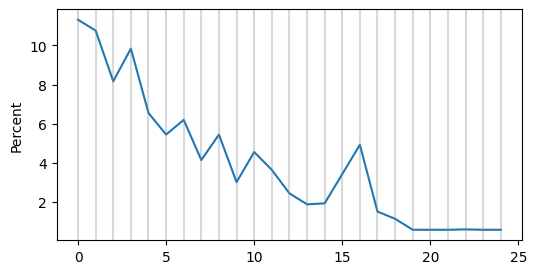

In [8]:
plt.figure(figsize=(6, 3))
plt.plot(df_sorted['perc'].to_numpy())
plt.ylabel('Percent')
for i in range(df_sorted.shape[0]):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [9]:
(df_sorted.iloc[15:17]['perc'] - (df_sorted.iloc[14]['perc'] + df_sorted.iloc[17]['perc']) / 2) * 2.5

15    4.25
16    8.00
Name: perc, dtype: float64

# This year

- Your goal is to choose up to two containers.
- First one is free
- Second one has a fee of 50000 Sea Shells
- Each container is said to hold at least 10.000 SeaShells.

In [10]:
def calc_treasure(mult, hunt, perc):
    return mult * 10000 / (hunt + perc)

In [11]:
mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
fee = 50000

In [12]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])

In [13]:
df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])

In [14]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [15]:
df_sorted

,mult,hunt,tre_naive
0,73,4,182500.000000
1,17,1,170000.000000
2,31,2,155000.000000
3,80,6,133333.333333
4,50,4,125000.000000
5,37,3,123333.333333
6,89,8,111250.000000
7,10,1,100000.000000
8,20,2,100000.000000
9,90,10,90000.000000


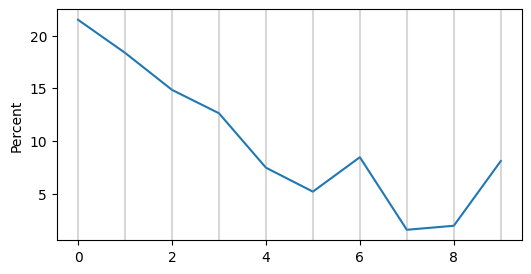

In [76]:
perc = np.linspace(1, 0.1, 10)** 2
perc = perc / perc.sum() * 100
perc += np.random.randint(0, 3, 10)
perc = perc / perc.sum() * 100
perc[-1] += 8
perc[6] += 4
perc[3] += 1
perc[7] -= 0.35
perc[8] += 0.35
perc = perc / perc.sum() * 100

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(10):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [77]:
(perc[5] + perc[7]) / 2

np.float64(3.3654902460212193)

In [78]:
perc

array([21.50524274, 18.36798297, 14.84762547, 12.62638342,  7.45487471,
        5.17699633,  8.44761553,  1.55398416,  1.93531136,  8.08398331])

In [79]:
perc[0], perc[6], perc[8], perc[9]

(np.float64(21.505242744180798),
 np.float64(8.447615527261544),
 np.float64(1.9353113600901208),
 np.float64(8.083983305222244))

In [80]:
df_sorted = df_sorted.assign(perc=perc)

In [81]:
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))

In [82]:
df_sorted

,mult,hunt,tre_naive,perc,tre
0,73,4,182500.000000,21.505243,28621.566449
1,17,1,170000.000000,18.367983,8777.372443
2,31,2,155000.000000,14.847625,18400.219105
3,80,6,133333.333333,12.626383,42949.829918
4,50,4,125000.000000,7.454875,43649.538960
5,37,3,123333.333333,5.176996,45248.889101
6,89,8,111250.000000,8.447616,54111.187030
7,10,1,100000.000000,1.553984,39154.510582
8,20,2,100000.000000,1.935311,50821.899895
9,90,10,90000.000000,8.083983,49767.796442


In [83]:
df_final = df_sorted.sort_values(by='tre', ascending=False)
df_final

,mult,hunt,tre_naive,perc,tre
6,89,8,111250.000000,8.447616,54111.187030
8,20,2,100000.000000,1.935311,50821.899895
9,90,10,90000.000000,8.083983,49767.796442
5,37,3,123333.333333,5.176996,45248.889101
4,50,4,125000.000000,7.454875,43649.538960
3,80,6,133333.333333,12.626383,42949.829918
7,10,1,100000.000000,1.553984,39154.510582
0,73,4,182500.000000,21.505243,28621.566449
2,31,2,155000.000000,14.847625,18400.219105
1,17,1,170000.000000,18.367983,8777.372443


In [84]:
print(f'Selected: {int(df_final.iloc[0]['mult'])}')
print(f'Profit: {int(df_final.iloc[0]['tre'])}')

Selected: 89
Profit: 54111


# Sensitivity analysis

In [85]:
selected = []
df_sum = pd.Series(data=np.zeros(10), index=df_final['mult'])
for _ in range(1000):
    mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
    hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
    fee = 50000
    
    df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])
    df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])
    df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)
    
    perc = np.linspace(1, 0.1, 10)** 2
    perc = perc / perc.sum() * 100
    perc += np.random.randint(0, 3, 10)
    perc = perc / perc.sum() * 100
    perc[-1] += 8
    perc[6] += 4
    perc[3] += 1
    perc[7] -= 0.35
    perc[8] += 0.35
    perc = perc / perc.sum() * 100
    
    # plt.figure(figsize=(6, 3))
    # plt.plot(perc)
    # plt.ylabel('Percent')
    # for i in range(10):
    # plt.axvline(i, c='gray', alpha=0.3)
    # plt.show()
    
    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    # print(df_final)

    df_sum = df_sum + df_final.set_index('mult', drop=True)['tre']
    selected.append(df_final.iloc[0]['mult'])
    selected.append(df_final.iloc[1]['mult'])

In [86]:
(df_sum / 1000).sort_values(ascending=False)

mult
89    56903.255543
20    51749.828556
90    49762.051267
80    44646.672143
37    41302.025871
50    40728.390473
10    31237.506506
73    28388.368193
31    19168.984385
17     9080.711684
dtype: float64

In [87]:
np.unique(selected, return_counts=True)

(array([20., 80., 89., 90.]), array([ 523,    1, 1000,  476]))

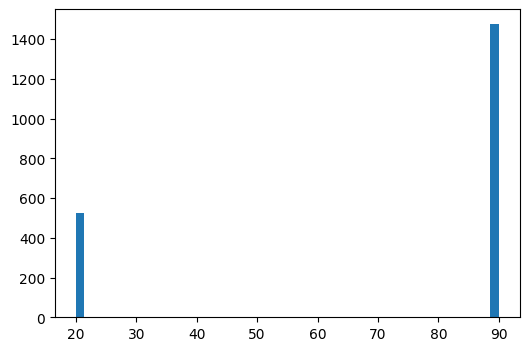

In [88]:
plt.figure(figsize=(6, 4))
plt.hist(selected, bins=50)
plt.show()

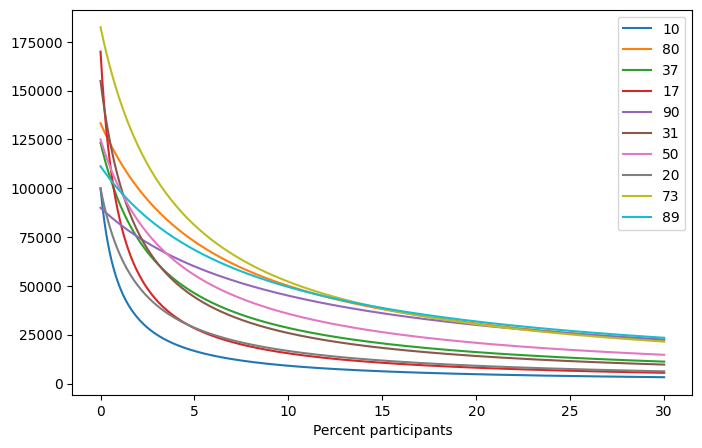

In [416]:
pct_range = np.arange(0, 30.1, 0.1)
treasure_list = []
for pct in pct_range:
    perc = np.ones(mult.shape) * pct
    treasure = calc_treasure(mult, hunt, perc)
    treasure_list.append(treasure.flatten())
cell_scores = []
for i in range(treasure_list[0].shape[0]):
    cell_scores.append([treasure[i] for treasure in treasure_list])
plt.figure(figsize=(8, 5))
for i, score in enumerate(cell_scores):
    plt.plot(pct_range, score, label=mult[i])
plt.xlabel('Percent participants')
plt.legend()
plt.show()